In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def load_kat_mx_file(file_path):
    """Load .mx data into numpy array; extract k from comment line."""
    with open(file_path, 'r') as f:
        lines = []
        k = None
        for line in f:
            if line.startswith('# Kmer value:'):
                k = int(line.strip().split(':')[1])
            if not line.startswith('#'):
                lines.append(line.strip())
        matrix_data = [list(map(float, line.split())) for line in lines]
        matrix = np.array(matrix_data)
    return matrix, k 

def compute_metrics(matrix, k):
    """
    Compute metrics from the matrix:
    - singleton_rdna_kmers: Number of kmers in rDNA with count 1
    - distinct_rdna_kmers: Number of distinct kmers in rDNA(count > 0)
    - total_rdna_kmers: Total number of kmers in rDNA
    - unique_rdna_kmers: Number of kmers in rDNA not occurring in reference genome
    - high_freq_unique_kmers: Number of unique kmers in rDNA with count >= 3 not occurring in reference genome
    - shared_kmers: Number of kmers shared between rDNA and reference genome
    - specificity: Ratio of distinct kmers in rDNA to total kmers in rDNA
    """
    metrics = {
        'k': k,
        'singleton_rdna_kmers': int(np.sum(matrix[:,1])),
        'distinct_rdna_kmers': int(np.sum(matrix[:,1:])),
        'total_rdna_kmers': int(np.sum(matrix[:, 1:] * np.arange(1, matrix.shape[1]))),
        'unique_rdna_kmers': int(np.sum(matrix[0,:])),
        'unique_kmers_freq_2': int(np.sum(matrix[0, 2:])),
        'unique_kmers_freq_3': int(np.sum(matrix[0, 3:])),
        'shared_kmers': int(np.sum(matrix[1:, 1])),
        'unique_kmer_fraction': np.sum(matrix[0,:]) / np.sum(matrix[:, 1:] * np.arange(1, matrix.shape[1]))
    }
    return metrics


,k,singleton_rdna_kmers,distinct_rdna_kmers,total_rdna_kmers,unique_rdna_kmers,unique_kmers_freq_2,unique_kmers_freq_3,shared_kmers,unique_kmer_fraction
1,15,33260,36223,42839,5729,220,58,27751,0.133733
14,17,34266,37119,42819,15484,622,115,19404,0.361615
0,19,35112,37855,42799,21547,876,130,14441,0.503446
15,21,35868,38470,42779,24535,1002,137,12335,0.573529
2,23,36520,38970,42760,26639,1090,147,10971,0.622989
16,25,37069,39377,42742,28390,1177,154,9856,0.664218
3,27,37542,39711,42724,29930,1246,151,8858,0.700543
17,29,37939,39985,42706,31349,1307,146,7897,0.734065
12,31,38289,40219,42688,32601,1334,135,7022,0.763704
7,33,38608,40426,42670,33690,1335,120,6253,0.789548


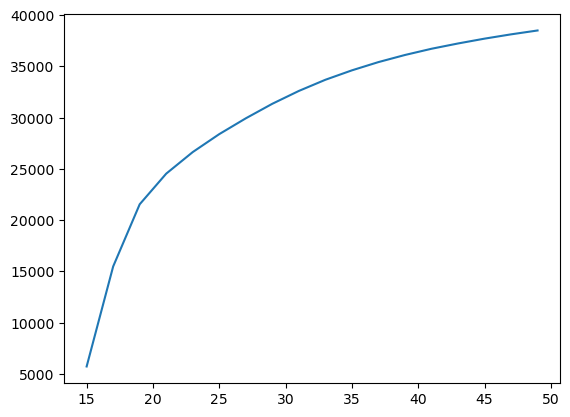

In [3]:
matdir = '/d/hd09/zhuohan/ectopic_rdna_proj/results/katcomp_matrices_hg002/'
mx_files = glob.glob(os.path.join(matdir, '*.mx'))
all_metrics = []

for mx_file in mx_files:
    matrix, k = load_kat_mx_file(mx_file)
    metrics = compute_metrics(matrix, k)
    all_metrics.append(metrics)

df = pd.DataFrame(all_metrics)
df.sort_values(by='k', inplace=True)
display(df)

plt.plot(df['k'], df['unique_rdna_kmers'], label='Singleton rDNA kmers')

,k,singleton_rdna_kmers,distinct_rdna_kmers,total_rdna_kmers,unique_rdna_kmers,unique_kmers_freq_2,unique_kmers_freq_3,shared_kmers,unique_kmer_fraction
13,15,33260,36223,42839,7523,282,77,26019,0.175611
9,17,34266,37119,42819,20090,849,171,15025,0.469184
12,19,35112,37855,42799,27321,1232,222,9023,0.638356
7,21,35868,38470,42779,30395,1418,237,6891,0.710512
11,23,36520,38970,42760,32357,1527,241,5690,0.756712
6,25,37069,39377,42742,33885,1609,233,4793,0.792780
10,27,37542,39711,42724,35142,1652,216,4052,0.822535
8,29,37939,39985,42706,36228,1661,193,3372,0.848312
0,31,38289,40219,42688,37128,1635,169,2796,0.869753
14,33,38608,40426,42670,37848,1589,145,2349,0.886993


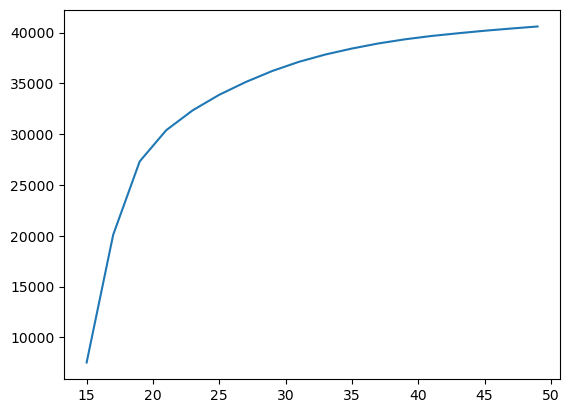

In [4]:
matdir = '/d/hd09/zhuohan/ectopic_rdna_proj/results/hg38-rdna_v1.0_no_rdna/'
mx_files = glob.glob(os.path.join(matdir, '*.mx'))
all_metrics = []

for mx_file in mx_files:
    matrix, k = load_kat_mx_file(mx_file)
    metrics = compute_metrics(matrix, k)
    all_metrics.append(metrics)

df = pd.DataFrame(all_metrics)
df.sort_values(by='k', inplace=True)
display(df)
plt.plot(df['k'], df['unique_rdna_kmers'], label='Singleton rDNA kmers')

,k,singleton_rdna_kmers,distinct_rdna_kmers,total_rdna_kmers,unique_rdna_kmers,unique_kmers_freq_2,unique_kmers_freq_3,shared_kmers,unique_kmer_fraction
16,15,33260,36223,42839,7459,273,71,26074,0.174117
3,17,34266,37119,42819,20015,833,163,15084,0.467433
17,19,35112,37855,42799,27259,1243,237,9096,0.636907
1,21,35868,38470,42779,30388,1463,271,6943,0.710349
14,23,36520,38970,42760,32402,1585,279,5703,0.757764
2,25,37069,39377,42742,33962,1657,264,4764,0.794581
15,27,37542,39711,42724,35227,1690,240,4005,0.824525
0,29,37939,39985,42706,36298,1693,212,3334,0.849951
6,31,38289,40219,42688,37178,1661,182,2772,0.870924
11,33,38608,40426,42670,37888,1610,153,2330,0.887931


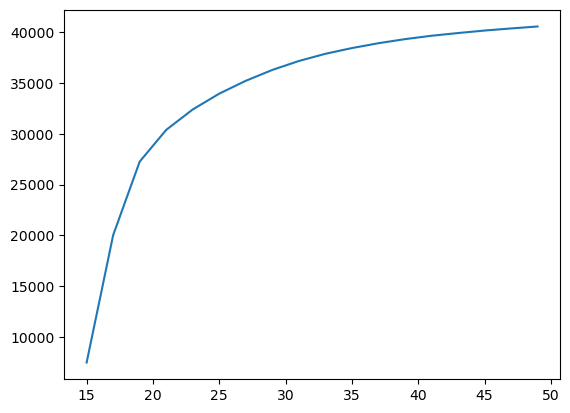

In [5]:
matdir = '/d/hd09/zhuohan/ectopic_rdna_proj/results/hs1-rdna_v1.0_no_rdna/'
mx_files = glob.glob(os.path.join(matdir, '*.mx'))
all_metrics = []

for mx_file in mx_files:
    matrix, k = load_kat_mx_file(mx_file)
    metrics = compute_metrics(matrix, k)
    all_metrics.append(metrics)

df = pd.DataFrame(all_metrics)
df.sort_values(by='k', inplace=True)
display(df)

plt.plot(df['k'], df['unique_rdna_kmers'], label='Singleton rDNA kmers')